In [2]:
import pandas as pd

In [3]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
train.head()

,id,anchor,target,context,score
0,37d61fd2272659b1,abatement,abatement of pollution,A47,0.50
1,7b9652b17b68b7a4,abatement,act of abating,A47,0.75
2,36d72442aefd8232,abatement,active catalyst,A47,0.25
3,5296b0c19e1ce60e,abatement,eliminating process,A47,0.50
4,54c1e3b9184cb5b6,abatement,forest region,A47,0.00


In [4]:
test.head()

,id,anchor,target,context
0,4112d61851461f60,opc drum,inorganic photoconductor drum,G02
1,09e418c93a776564,adjust gas flow,altering gas flow,F23
2,36baf228038e314b,lower trunnion,lower locating,B60
3,1f37ead645e7f0c8,cap component,upper portion,D06
4,71a5b6ad068d531f,neural stimulation,artificial neural network,H04


In [5]:
df = pd.DataFrame(train)

In [6]:
# counting words in anchor column
wordcount_anchor = df['anchor'].str.split().str.len()
wordcount_anchor

0        1
1        1
2        1
3        1
4        1
        ..
36468    2
36469    2
36470    2
36471    2
36472    2
Name: anchor, Length: 36473, dtype: int64

In [26]:
wordcount_anchor.max()

5

In [7]:
# using the maximum number of words in 'anchor' plus one for the number of columns so each word in a row gets its own column
split_anchor = df['anchor'].str.rsplit(' ', 6, expand=True)
split_anchor

,0,1,2,3,4
0,abatement,None,None,None,None
1,abatement,None,None,None,None
2,abatement,None,None,None,None
3,abatement,None,None,None,None
4,abatement,None,None,None,None
...,...,...,...,...,...
36468,wood,article,None,None,None
36469,wood,article,None,None,None
36470,wood,article,None,None,None
36471,wood,article,None,None,None


In [8]:
# counting words in target column
wordcount_target = df['target'].str.split().str.len()
wordcount_target

0        3
1        3
2        2
3        2
4        2
        ..
36468    2
36469    2
36470    2
36471    2
36472    2
Name: target, Length: 36473, dtype: int64

In [29]:
wordcount_target.max()

15

In [9]:
# doing the same as we did for anchor
split_target = df['target'].str.rsplit(' ', 16, expand=True)
split_target

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,abatement,of,pollution,None,None,None,None,None,None,None,None,None,None,None,None
1,act,of,abating,None,None,None,None,None,None,None,None,None,None,None,None
2,active,catalyst,None,None,None,None,None,None,None,None,None,None,None,None,None
3,eliminating,process,None,None,None,None,None,None,None,None,None,None,None,None,None
4,forest,region,None,None,None,None,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36468,wooden,article,None,None,None,None,None,None,None,None,None,None,None,None,None
36469,wooden,box,None,None,None,None,None,None,None,None,None,None,None,None,None
36470,wooden,handle,None,None,None,None,None,None,None,None,None,None,None,None,None
36471,wooden,material,None,None,None,None,None,None,None,None,None,None,None,None,None


In [9]:
split_target.value_counts()

0  1  2              3  4        5  6           7    8           9  10                 11  12            13  14 
3  4  hydroxyphenyl  6  methoxy  7  2s3r4s5s6r  345  trihydroxy  6  hydroxymethyloxan  2   yloxychromen  4   one    1
dtype: int64

In [10]:
anchor_target = pd.concat([split_anchor, split_target], axis = 1)
anchor_target.head()

,0,1,2,3,4,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,abatement,None,None,None,None,abatement,of,pollution,None,None,None,None,None,None,None,None,None,None,None,None
1,abatement,None,None,None,None,act,of,abating,None,None,None,None,None,None,None,None,None,None,None,None
2,abatement,None,None,None,None,active,catalyst,None,None,None,None,None,None,None,None,None,None,None,None,None
3,abatement,None,None,None,None,eliminating,process,None,None,None,None,None,None,None,None,None,None,None,None,None
4,abatement,None,None,None,None,forest,region,None,None,None,None,None,None,None,None,None,None,None,None,None


In [20]:
anchor_target

,0,1,2,3,4,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,abatement,None,None,None,None,abatement,of,pollution,None,None,None,None,None,None,None,None,None,None,None,None
1,abatement,None,None,None,None,act,of,abating,None,None,None,None,None,None,None,None,None,None,None,None
2,abatement,None,None,None,None,active,catalyst,None,None,None,None,None,None,None,None,None,None,None,None,None
3,abatement,None,None,None,None,eliminating,process,None,None,None,None,None,None,None,None,None,None,None,None,None
4,abatement,None,None,None,None,forest,region,None,None,None,None,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36468,wood,article,None,None,None,wooden,article,None,None,None,None,None,None,None,None,None,None,None,None,None
36469,wood,article,None,None,None,wooden,box,None,None,None,None,None,None,None,None,None,None,None,None,None
36470,wood,article,None,None,None,wooden,handle,None,None,None,None,None,None,None,None,None,None,None,None,None
36471,wood,article,None,None,None,wooden,material,None,None,None,None,None,None,None,None,None,None,None,None,None


In [37]:
anchor_target.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
36468     True
36469     True
36470     True
36471    False
36472    False
Length: 36473, dtype: bool

All 'false' rows have no duplicated words, so the score for those rows are zero. 'True' rows have at least 1 set of duplicated words.

In [36]:
df1=anchor_target.duplicated()
df1.value_counts()

False    33397
True      3076
dtype: int64

<AxesSubplot:title={'center':'Anchor and Target have repeated words'}, ylabel='Number of cases'>

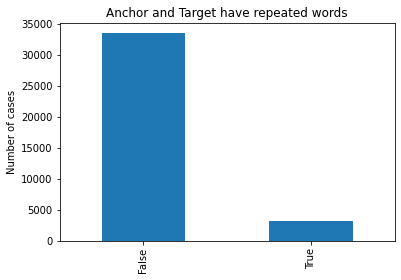

In [42]:
df2=df1.value_counts()
df2.plot.bar(title='Anchor and Target have repeated words', ylabel='Number of cases')

In [18]:
anchor_target[anchor_target.duplicated(keep=False)]

,0,1,2,3,4,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
12,abatement,None,None,None,None,pollution,abatement,None,None,None,None,None,None,None,None,None,None,None,None,None
21,abatement,None,None,None,None,emission,abatement,None,None,None,None,None,None,None,None,None,None,None,None,None
24,abatement,None,None,None,None,pollution,abatement,None,None,None,None,None,None,None,None,None,None,None,None,None
25,abatement,None,None,None,None,abatement,apparatus,None,None,None,None,None,None,None,None,None,None,None,None,None
27,abatement,None,None,None,None,abatement,apparatus,None,None,None,None,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36462,wood,article,None,None,None,wood,None,None,None,None,None,None,None,None,None,None,None,None,None,None
36466,wood,article,None,None,None,wood,material,None,None,None,None,None,None,None,None,None,None,None,None,None
36468,wood,article,None,None,None,wooden,article,None,None,None,None,None,None,None,None,None,None,None,None,None
36469,wood,article,None,None,None,wooden,box,None,None,None,None,None,None,None,None,None,None,None,None,None


Above shows that only 5,819 rows out of the total 36,473 have duplicated words.

In [14]:
anchor_target.nunique()

0      606
1      495
2      162
3       29
4        4
0     6813
1     4666
2     2332
3      834
4      265
5      103
6       42
7       17
8       12
9        9
10       6
11       4
12       3
13       1
14       1
dtype: int64